# Task 4 - To Explore Decision Tree Algorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

**A little introduction to Decision Tree:**
* Most commonly used classification technique
* Builds a model in the form of a tree structure 
* Goal: create a model that predicts the value of the output variable based on the input variables in the feature vector
* Maps out all the possible decision paths in the form of a tree


In [6]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

I'll give you a brief intro on these libraries:

    Numpy - It is majorly used for solving mathematical equations and we will be needing this library for evaluating our model
    Pandas - It provides best tools for quick analysis in preparing and loading the data
    Matplotlib, Seaborn - It will help us plot visualisations
    Kmeans - to apply kmeans algorithm to our dataset
    train_test_split -  to split the features into training and testing dataset
    DecisionTreeClassifier - to implement decision tree algorithm to our dataset
    plot_tree - to visualize the decision tree


In [2]:
#load the dataset
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
#read the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Brief Data Analysis

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Here, 25% -> quantile value and thus, 25% of the flowers have sepallength value lower than or equal to 38.25 and similarly we can check for others.

50% -> median value and this,50% of the flowers have sepallength lower than or equal to 75.5 and similarly we can check for others.


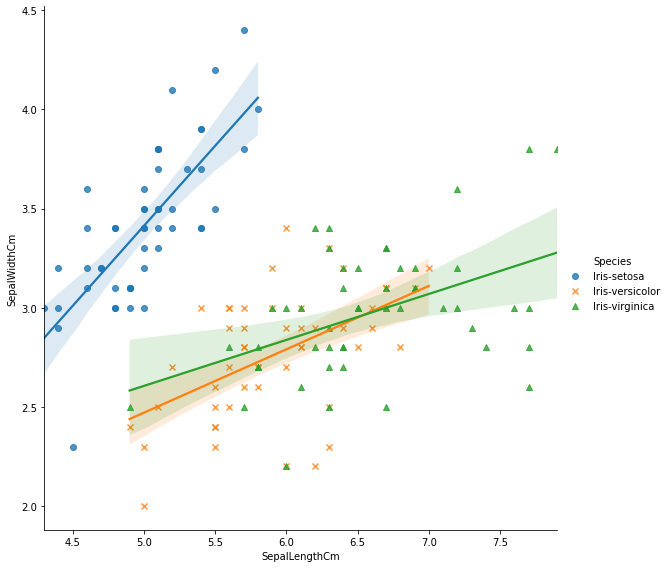

In [5]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, height=8, markers=["o", "x", "^"])

The value of sepal width for Setosa changes rapidly with respect to sepal length than the other two categories

## Splitting dataset

In [7]:
#split the dataset into training and testing 
y= df["Species"]
x= df.drop("Species",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state= 42)

In [9]:
print(x.head())
print(y.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [10]:
print(x_train.head())
print(y_train.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
81    82            5.5           2.4            3.7           1.0
133  134            6.3           2.8            5.1           1.5
137  138            6.4           3.1            5.5           1.8
75    76            6.6           3.0            4.4           1.4
109  110            7.2           3.6            6.1           2.5
81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
Name: Species, dtype: object


## Implementing Decision Tree

In [11]:
dt = DecisionTreeClassifier(random_state = 43)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

[Text(669.5999999999999, 906.0, 'Id <= 100.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = Iris-setosa'),
 Text(446.4, 543.6, 'PetalWidthCm <= 0.8\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]\nclass = Iris-setosa'),
 Text(223.2, 181.19999999999993, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Iris-setosa'),
 Text(669.5999999999999, 181.19999999999993, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-setosa'),
 Text(892.8, 543.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = Iris-setosa')]

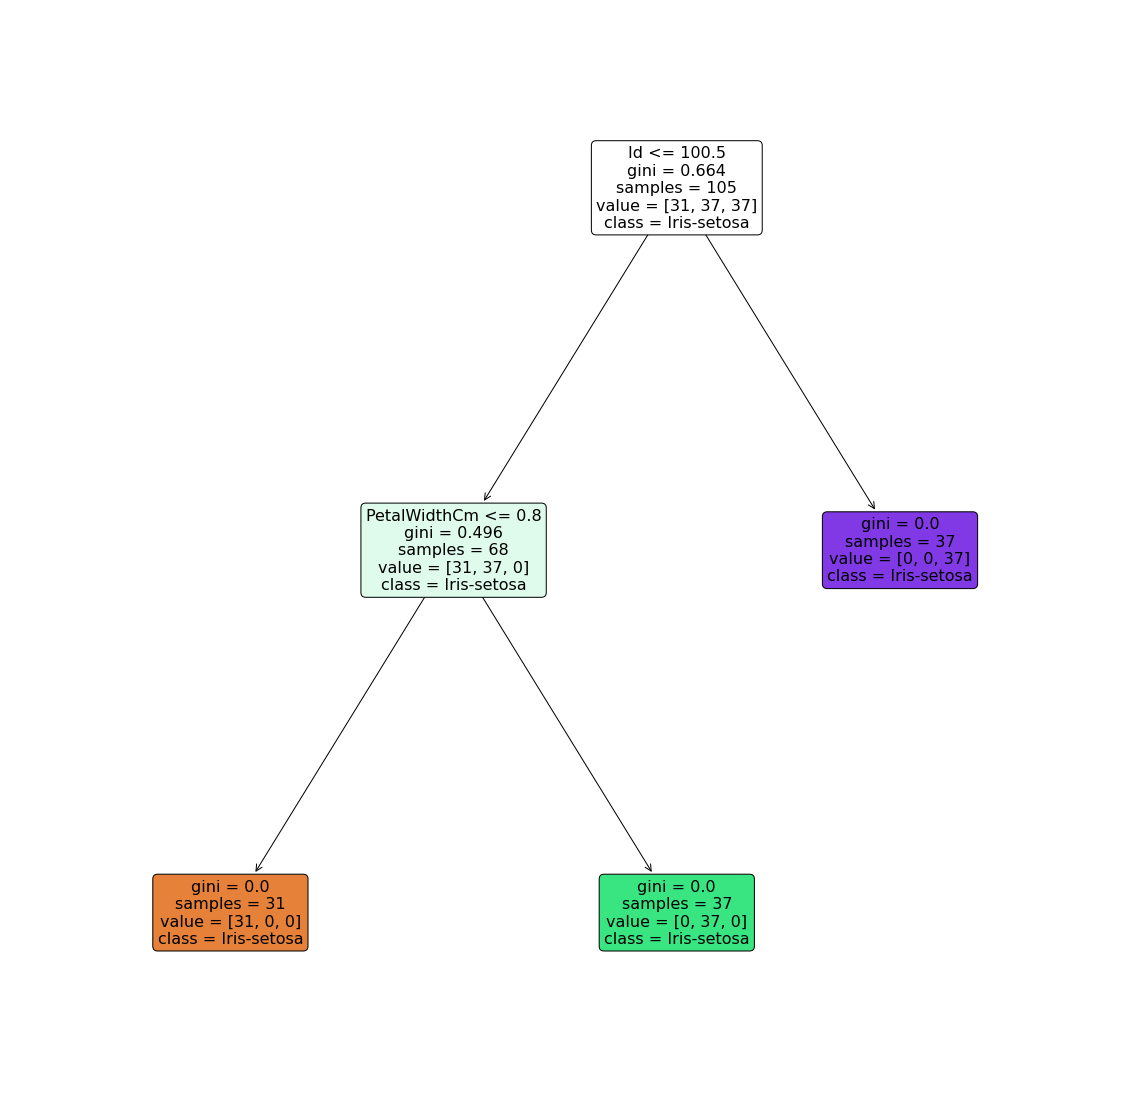

In [15]:
plt.figure(figsize=(20,20))
plt.title("Decision Tree")
plot_tree(dt, feature_names=x_train.columns, class_names= y, filled=True, rounded = True,fontsize= 16)

In [13]:
y_pred = dt.predict(x_test)

In [14]:


y_actual = pd.DataFrame(y_test.value_counts())
y_actual = y_actual.reset_index()
y_actual.columns = ['Condition', 'AcutalCnt']

y_predicted = pd.DataFrame(y_pred, columns=["Predicted"])["Predicted"]
y_predicted = pd.DataFrame(y_predicted.value_counts())
y_predicted = y_predicted.reset_index()
y_predicted.columns = ["Condition","PredictCnt"]
y_predicted

confusion_df = pd.merge(y_actual, y_predicted, on='Condition', how='outer')
confusion_df['Error'] = abs(confusion_df['AcutalCnt']-confusion_df['PredictCnt'])
confusion_df
accuracy = (confusion_df.AcutalCnt.sum()-confusion_df.Error.sum())/confusion_df.AcutalCnt.sum()*100
print(confusion_df)
print("Model Accuracy is", accuracy)



         Condition  AcutalCnt  PredictCnt  Error
0      Iris-setosa         19          19      0
1  Iris-versicolor         13          13      0
2   Iris-virginica         13          13      0
Model Accuracy is 100.0
